### Plot the output of all convolutional layers and discuss the insights on automatically created features.

#### For one vs rest

1/1 [==============================] - 6s 6s/step


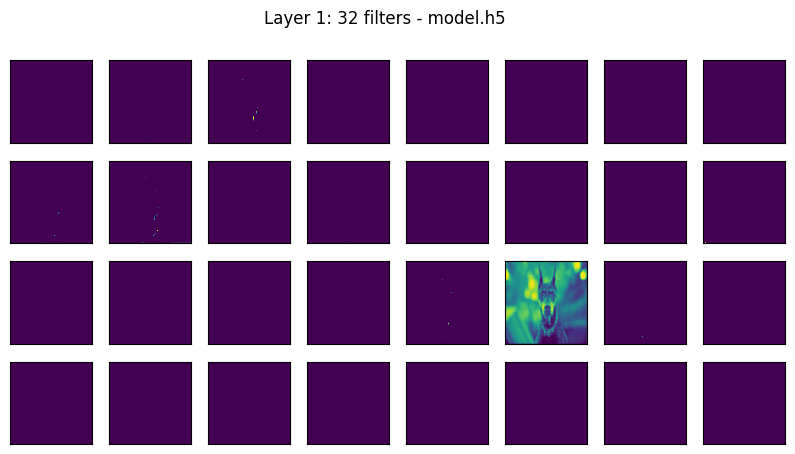

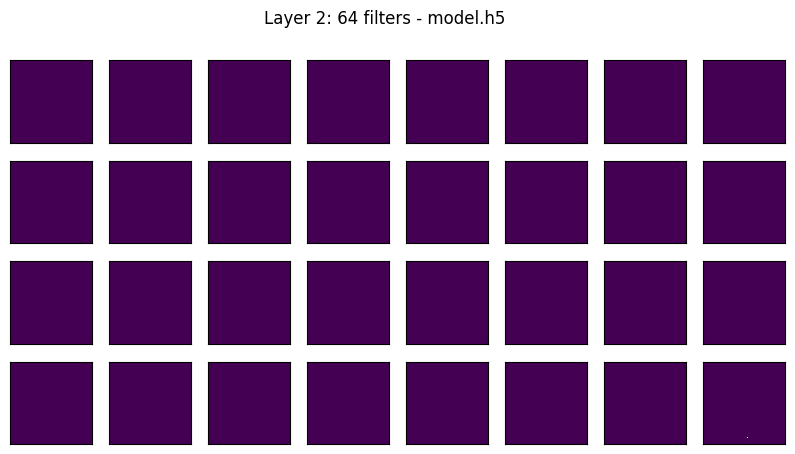

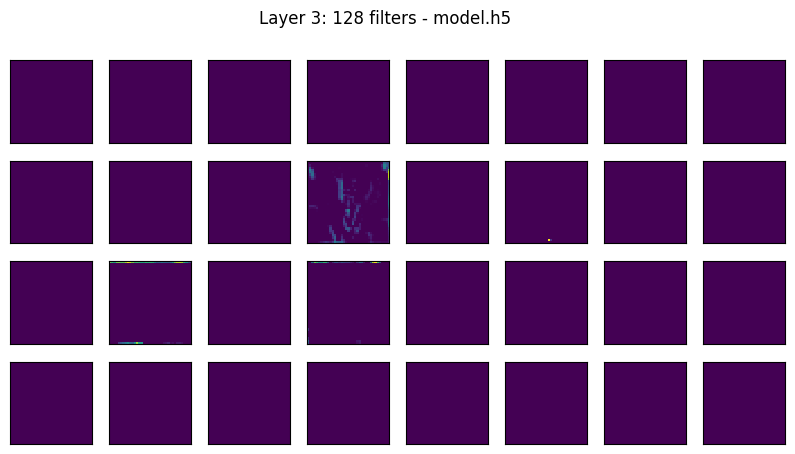

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from PIL import Image

def plot_conv_layer_outputs(model_path, sample_image_path):
    # Load the model
    model = load_model(model_path)

    sample_image = np.array(Image.open(sample_image_path))
    sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension

    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(sample_image)

    for i, activation in enumerate(activations):
        plt.figure(figsize=(10, 5))
        for j in range(min(32, activation.shape[-1])):  # Plot up to 32 channels
            ax = plt.subplot(4, 8, j + 1)
            ax.matshow(activation[0, :, :, j], cmap='viridis')
            plt.xticks([])
            plt.yticks([])
        plt.suptitle(f'Layer {i+1}: {activation.shape[3]} filters - {model_path}')
        plt.show()

sample_image_path = 'split/test/non_raccoon/0be3797d3d.jpg'
model_path = 'model.h5'
plot_conv_layer_outputs(model_path, sample_image_path)


#### For 5 class classification

1/1 [==============================] - 1s 681ms/step


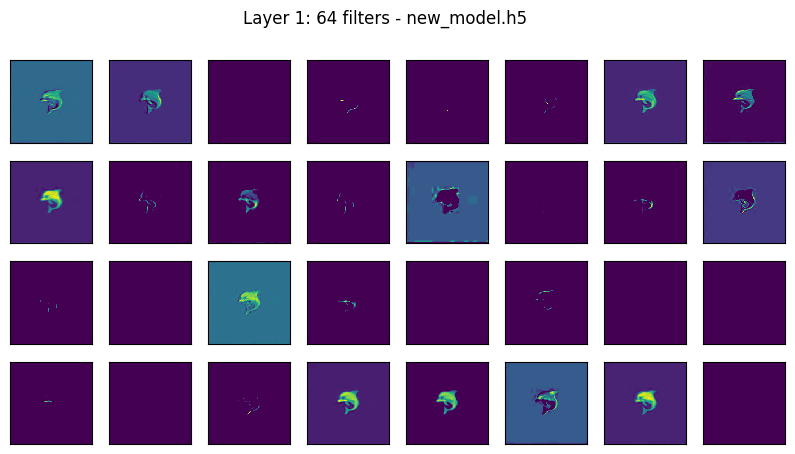

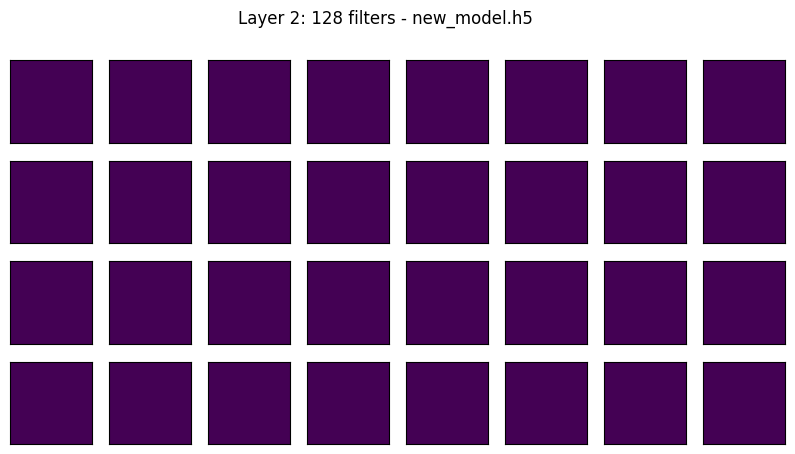

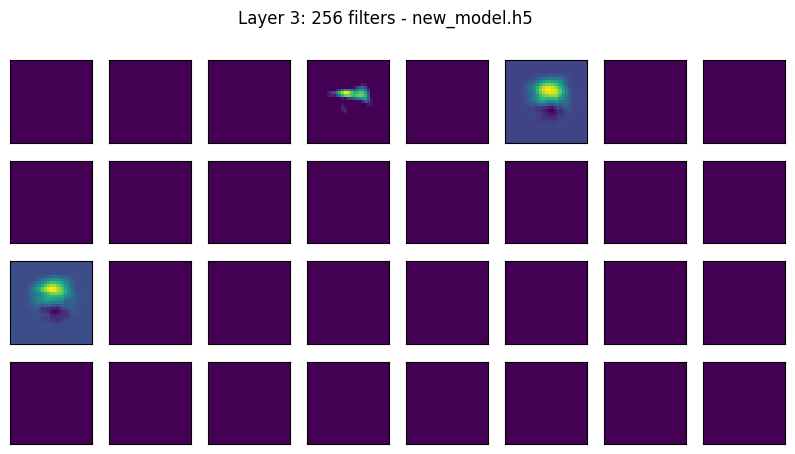

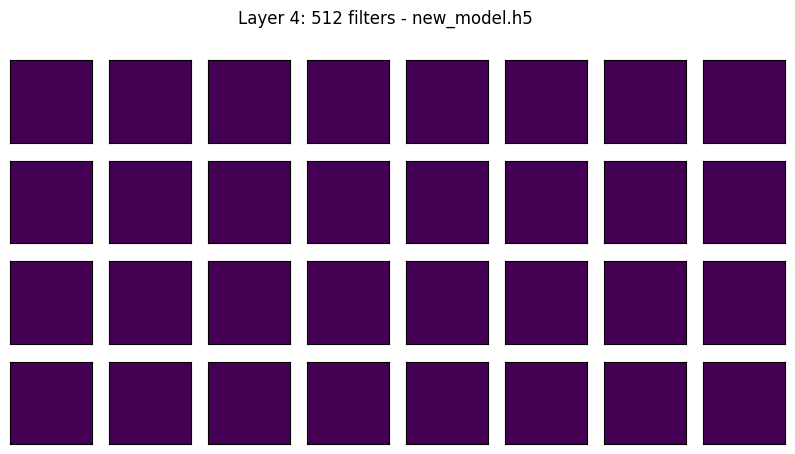

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from PIL import Image

def plot_conv_layer_outputs(model_path, sample_image_path):
    model = load_model(model_path)

    sample_image = np.array(Image.open(sample_image_path))
    sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension

    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(sample_image)
    for i, activation in enumerate(activations):
        plt.figure(figsize=(10, 5))
        for j in range(min(32, activation.shape[-1])):
            ax = plt.subplot(4, 8, j + 1)
            ax.matshow(activation[0, :, :, j], cmap='viridis')
            plt.xticks([])
            plt.yticks([])
        plt.suptitle(f'Layer {i+1}: {activation.shape[3]} filters - {model_path}')
        plt.show()

sample_image_path = 'split2/test/dolphin/3c49678251.jpg'

model_path = 'new_model.h5'
plot_conv_layer_outputs(model_path, sample_image_path)
